<a href="https://colab.research.google.com/github/karljmurphy/logistic_regression/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving iris_2.csv to iris_2.csv


In [3]:
df = pd.read_csv('iris_2.csv')
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# Observation: means and medians for each recorded feature are close which suggests that data is normally distributed

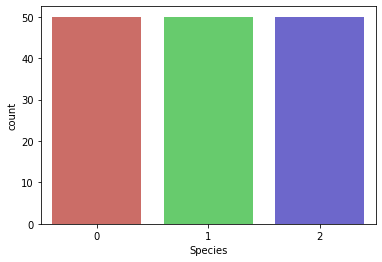

<Figure size 432x288 with 0 Axes>

In [32]:

sns.countplot(x='Species', data=df, palette='hls')
plt.show()
plt.savefig('count-plot')


# We see from the above histogram that the "Species" variable is well balanced with equal representations which minimizes the risk of bias occurring as would be the case if one class had more records than another.

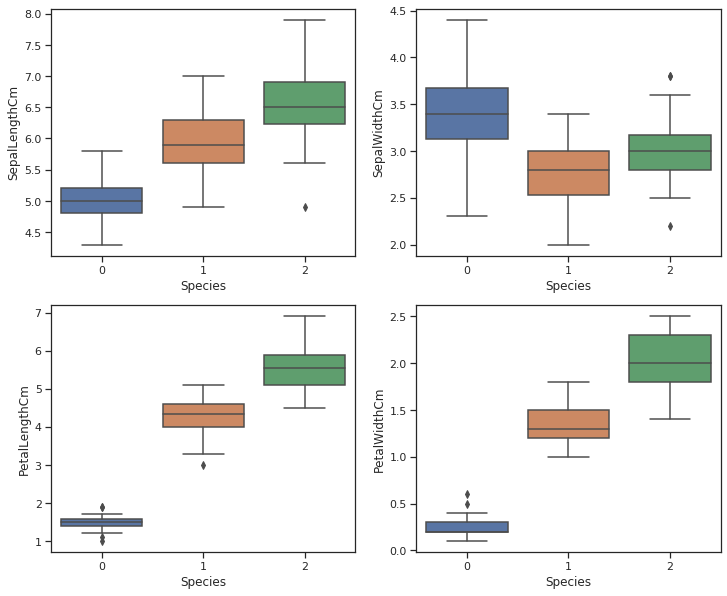

In [40]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.show()

# The isolated points that can be seen in the box-plots above are the outliers in the data. Since these are very few in number, it wouldn't have any significant impact on our analysis.

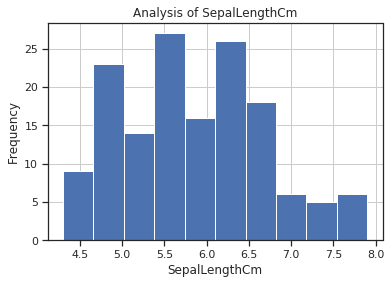

In [41]:
df.SepalLengthCm.hist()
plt.title('Analysis of SepalLengthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.savefig('SepalLengthCm')

# Observation: Distribution is not perfectly Gaussian since the tails of the distribution have ample data.

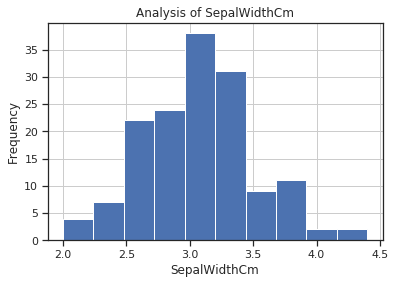

In [42]:
df.SepalWidthCm.hist()
plt.title('Analysis of SepalWidthCm')
plt.xlabel('SepalWidthCm')
plt.ylabel('Frequency')
plt.savefig('SepalWidthCm')

# Observation: Distribution looks normally distributed. 

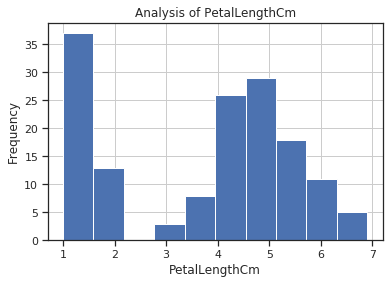

In [43]:
df.PetalLengthCm.hist()
plt.title('Analysis of PetalLengthCm')
plt.xlabel('PetalLengthCm')
plt.ylabel('Frequency')
plt.savefig('PetalLengthCm')

# Observation: Missing data at interval between 2-3cm. Was the sample size too small and so data was not collected or does data for these points not exist in nature? How do we correct?

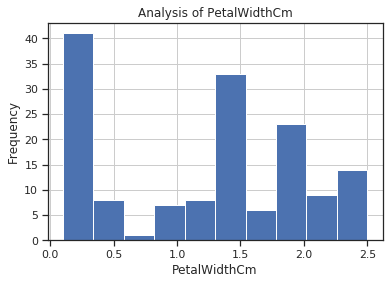

In [45]:
df.PetalWidthCm.hist()
plt.title('Analysis of PetalWidthCm')
plt.xlabel('PetalWidthCm')
plt.ylabel('Frequency')
plt.savefig('PetPetalWidthCmalLengthCm')

In [44]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
0,25.5,5.006,3.418,1.464,0.244
1,75.5,5.936,2.770,4.260,1.326
2,125.5,6.588,2.974,5.552,2.026


# Observations:

Sepal Width variable may not be a great predictor of the class but petal width may be a good predictor variable

In [10]:
corr = df.corr()[['Species']].sort_values(by='Species',ascending=False)
corr.style.background_gradient()

,Species
Species,1
PetalWidthCm,0.956464
PetalLengthCm,0.949043
Id,0.94283
SepalLengthCm,0.782561
SepalWidthCm,-0.419446


# Petal length and width very highly correlated with class of flower. Sepal Width as a negative correlation

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X = add_constant(X)
y=df['Species']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])

[7.103113442833282, 2.099038625742089, 31.39729165071975, 16.141563956997683]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# What is the significance of this test on the data?

In [34]:

import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sml
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']
logit = sml.MNLogit(y, x)
mdl_fit = logit.fit()
print(mdl_fit.summary())

         Current function value: 0.072470
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                Species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      142
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Feb 2020   Pseudo R-squ.:                  0.9340
Time:                        17:38:13   Log-Likelihood:                -10.870
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 1.706e-63
    Species=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
SepalLengthCm    -5.4111     30.081     -0.180      0.857     -64.369      53.547
SepalWidthCm      1.2593     29.661      0.042      0.96

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Observation: StatsModel convergence failure when doing multivariate analysis. What is the best way to conduct analysis of dataset?

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = classifier.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


Create the confusion matrix

What is this telling us? It is telling us what our Logistis Regression classifier predicted (on the test set). So, taking one example of the box that says 13. This is saying our model predicted 13 test set records were class 0 and these 13 records were classified correctly (note the test set has an actual output or class value for each record). We compare what we predicted against each actual output value on the test set).

Look at the box marked 1. This is telling us that the actual class the flower belonged to was 1 but we predicted that the test set record belonged to class 2.

Text(0.5, 257.44, 'Predicted label')

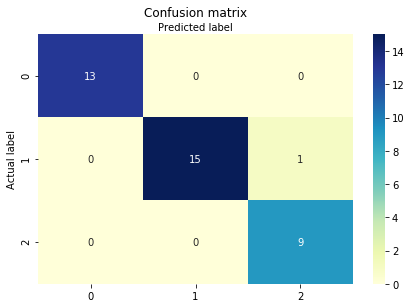

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



[link text](https://muthu.co/understanding-the-classification-report-in-sklearn/)   ...<<<---understanding classification report